<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Fast-Delivery-Agent-Reviews/blob/main/Fast_Delivery_Agent_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fast Delivery Agent Reviews

# Data Reading

In [23]:
import pandas as pd
df = pd.read_csv('/content/Fast Delivery Agent Reviews.csv')
df

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,2.4,Assume president far economic us discuss hand ...,56,Bangalore,Grocery,Neutral,High,No,In Stock,1,Correct
4996,JioMart,3.2,Chance new edge beyond pass treat laugh woman ...,45,Hyderabad,Grocery,Negative,Low,Yes,In Stock,2,Incorrect
4997,Zepto,4.7,Until few population choose value behavior win...,48,Pune,Pharmacy,Positive,High,No,In Stock,5,Incorrect
4998,JioMart,3.8,Fight where recently half enter information ki...,11,Bangalore,Food,Negative,High,Yes,Out of Stock,1,Correct


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review Text              5000 non-null   object 
 3   Delivery Time (min)      5000 non-null   int64  
 4   Location                 5000 non-null   object 
 5   Order Type               5000 non-null   object 
 6   Customer Feedback Type   5000 non-null   object 
 7   Price Range              5000 non-null   object 
 8   Discount Applied         5000 non-null   object 
 9   Product Availability     5000 non-null   object 
 10  Customer Service Rating  5000 non-null   int64  
 11  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 468.9+ KB


# Data Preprocessing

In [3]:
df.isnull().sum() #no null values present

,0
Agent Name,0
Rating,0
Review Text,0
Delivery Time (min),0
Location,0
Order Type,0
Customer Feedback Type,0
Price Range,0
Discount Applied,0
Product Availability,0


In [4]:
df.duplicated().sum() #no duplicated present

np.int64(0)

In [8]:
for i in df.columns:
  print(i,df[i].nunique(),df[i].dtype)
  print(df[i].unique())

Agent Name 4 object
['Zepto' 'JioMart' 'Blinkit' 'Swiggy Instamart']
Rating 41 float64
[4.5 2.1 2.6 3.6 1.9 3.3 1.5 2.8 2.5 2.9 4.6 1.8 3.8 2.  4.7 2.3 2.2 1.1
 1.3 4.8 2.4 1.6 3.4 3.1 4.3 2.7 3.7 3.  3.9 1.  1.2 4.1 4.4 1.4 1.7 5.
 4.9 4.  3.2 4.2 3.5]
Review Text 5000 object
['Purpose boy job cup decision girl now get job yard.'
 'Prevent production able both the box school way issue grow action figure one.'
 'Family station listen agreement more kitchen lose hour hour.' ...
 'Until few population choose value behavior window face light since back area.'
 'Fight where recently half enter information kid institution left.'
 'Agreement challenge boy coach low person these exist it eight ago recognize.']
Delivery Time (min) 51 int64
[58 25 54 22 34 43 46 20 10 32 17 59 15 24 49 51 12 33 14 53 60 55 38 48
 37 47 41 39 19 35 30 11 23 50 36 57 18 31 56 13 40 52 26 16 21 28 45 27
 29 42 44]
Location 10 object
['Delhi' 'Lucknow' 'Ahmedabad' 'Chennai' 'Pune' 'Jaipur' 'Mumbai'
 'Kolkata' 'Hyde

In [10]:
df.drop("Review Text",inplace=True,axis=1)

# Pandas Analysis

In [24]:
#What is the average customer rating?

df["Rating"].mean()

np.float64(3.0029)

In [25]:
#What is the average delivery time (in minutes) per delivery agent?

df.groupby("Agent Name")["Delivery Time (min)"].mean()

,Delivery Time (min)
Agent Name,
Blinkit,34.649371
JioMart,35.026961
Swiggy Instamart,35.119476
Zepto,35.061622


In [27]:
#How many reviews per delivery agent?

df["Agent Name"].value_counts()

,count
Agent Name,
Zepto,1282
Blinkit,1272
JioMart,1224
Swiggy Instamart,1222


In [29]:
#What is the distribution of customer feedback types?

df['Customer Feedback Type'].value_counts()


,count
Customer Feedback Type,
Negative,1727
Positive,1648
Neutral,1625


In [32]:
#What is the most common price range among order type?

df.groupby("Order Type")["Price Range"].value_counts().reset_index().sort_values("count",ascending=False).reset_index().head(1)

,index,Order Type,Price Range,count
0,12,Pharmacy,High,378


In [33]:
#What is the average rating by delivery agent?

df.groupby(["Agent Name"])["Rating"].mean()

,Rating
Agent Name,
Blinkit,2.993239
JioMart,2.985376
Swiggy Instamart,3.018331
Zepto,3.014509


In [34]:
#What is the average customer service rating by city?

df.groupby("Location")["Customer Service Rating"].mean()

,Customer Service Rating
Location,
Ahmedabad,3.000000
Bangalore,2.781676
Chennai,2.912134
Delhi,3.011673
Hyderabad,2.865306
Jaipur,3.042945
Kolkata,2.996132
Lucknow,3.121019
Mumbai,2.975904


In [35]:
#What is the count of correct vs incorrect orders?

df["Order Accuracy"].value_counts()

,count
Order Accuracy,
Correct,2515
Incorrect,2485


In [36]:
#Which order type has the fastest average delivery time?

df.groupby("Order Type")["Delivery Time (min)"].mean().reset_index().sort_values("Delivery Time (min)",ascending=False).reset_index().head(1)


,index,Order Type,Delivery Time (min)
0,1,Essentials,35.287712


In [37]:
#What is the average rating for orders with vs without discount?

df.groupby("Discount Applied")["Rating"].mean()

,Rating
Discount Applied,
No,2.985302
Yes,3.019984


In [38]:
# Correlation between delivery time and rating
print(df[['Delivery Time (min)', 'Rating']].corr())


                     Delivery Time (min)    Rating
Delivery Time (min)             1.000000  0.006385
Rating                          0.006385  1.000000


In [44]:
#  Agent performance in cities with lowest service ratings
low_service_cities = df.groupby('Location')['Customer Service Rating'].mean().nsmallest(3).index
df[df['Location'].isin(low_service_cities)].groupby('Agent Name')['Rating'].mean()

,Rating
Agent Name,
Blinkit,3.051733
JioMart,2.900264
Swiggy Instamart,3.141477
Zepto,2.936267


In [43]:
#  Ratings comparison: when product is in stock and discount is applied
mask = (df['Product Availability'] == 'In Stock') & (df['Discount Applied'] == 'Yes')
df[mask]['Rating'].mean(), df[~mask]['Rating'].mean()

(np.float64(3.0146440129449843), np.float64(2.999043570669501))

In [42]:
# Top 3 Agent + Order Type combinations by rating
df.groupby(['Agent Name', 'Order Type'])['Rating'].mean().sort_values(ascending=False).head(3)

,,Rating
Agent Name,Order Type,
Zepto,Essentials,3.128058
Blinkit,Food,3.053558
Swiggy Instamart,Essentials,3.040637


# Encoding

In [11]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i]=oe.fit_transform(df[[i]])
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,3.0,4.5,58,3.0,1.0,1.0,0.0,1.0,1.0,4,1.0
1,3.0,2.1,25,7.0,3.0,0.0,1.0,0.0,1.0,2,0.0
2,1.0,4.5,54,0.0,1.0,1.0,1.0,0.0,1.0,3,0.0
3,1.0,2.6,22,2.0,1.0,1.0,1.0,1.0,0.0,1,1.0
4,3.0,3.6,34,9.0,4.0,2.0,0.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,2.4,56,1.0,3.0,1.0,0.0,0.0,0.0,1,0.0
4996,1.0,3.2,45,4.0,3.0,0.0,1.0,1.0,0.0,2,1.0
4997,3.0,4.7,48,9.0,4.0,2.0,0.0,0.0,0.0,5,1.0
4998,1.0,3.8,11,1.0,2.0,0.0,0.0,1.0,1.0,1,0.0


# Correlation Analysis

In [12]:
df.corr()

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
Agent Name,1.000000,0.009377,0.010129,0.010079,-0.006133,-0.013231,0.022248,0.012202,-0.003373,-0.019576,-0.016125
Rating,0.009377,1.000000,0.006385,-0.008194,-0.013982,0.007974,0.026552,0.015051,0.005118,0.008867,-0.000488
Delivery Time (min),0.010129,0.006385,1.000000,-0.002961,-0.018967,0.022030,0.000785,-0.008240,0.019857,-0.002928,0.019514
Location,0.010079,-0.008194,-0.002961,1.000000,-0.010743,0.001808,0.015893,-0.013848,-0.007125,0.033003,-0.000650
Order Type,-0.006133,-0.013982,-0.018967,-0.010743,1.000000,0.000246,-0.036889,-0.005299,-0.002822,0.004714,0.016375
Customer Feedback Type,-0.013231,0.007974,0.022030,0.001808,0.000246,1.000000,-0.014983,-0.007751,0.000267,-0.007117,-0.015455
Price Range,0.022248,0.026552,0.000785,0.015893,-0.036889,-0.014983,1.000000,-0.007595,-0.002925,0.004524,0.012168
Discount Applied,0.012202,0.015051,-0.008240,-0.013848,-0.005299,-0.007751,-0.007595,1.000000,0.024785,-0.014461,0.010490
Product Availability,-0.003373,0.005118,0.019857,-0.007125,-0.002822,0.000267,-0.002925,0.024785,1.000000,-0.026079,0.016007
Customer Service Rating,-0.019576,0.008867,-0.002928,0.033003,0.004714,-0.007117,0.004524,-0.014461,-0.026079,1.000000,-0.029343


In [ ]:
#INFERENCE FROM CORRELATION TEST:
#Here columns show some level of correlation with other columns.
#lets go ahead with Statistical test for further analysis

# Statistical Analysis

In [13]:
from scipy import stats

In [14]:
df.columns

Index(['Agent Name', 'Rating', 'Delivery Time (min)', 'Location', 'Order Type',
       'Customer Feedback Type', 'Price Range', 'Discount Applied',
       'Product Availability', 'Customer Service Rating', 'Order Accuracy'],
      dtype='object')

In [15]:
continuous=['Rating', 'Delivery Time (min)']

categories=['Agent Name', 'Location', 'Order Type',
       'Customer Feedback Type', 'Price Range', 'Discount Applied',
       'Product Availability', 'Customer Service Rating', 'Order Accuracy']

In [16]:
#TWO SAMPLE T - TEST : continuous vs continuous
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [17]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [18]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [19]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [20]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
Agent Name,1,1,1,0,0,0,0,0,0,0,0
Rating,1,1,0,1,1,0,0,1,1,1,1
Delivery Time (min),1,0,1,1,1,1,1,1,1,1,1
Location,0,1,1,1,0,0,0,0,0,0,0
Order Type,0,1,1,0,1,0,1,0,0,0,0
Customer Feedback Type,0,0,1,0,0,1,0,0,0,0,0
Price Range,0,0,1,0,1,0,1,0,0,0,0
Discount Applied,0,1,1,0,0,0,0,1,0,0,0
Product Availability,0,1,1,0,0,0,0,0,1,0,0
Customer Service Rating,0,1,1,0,0,0,0,0,0,1,0


<Axes: >

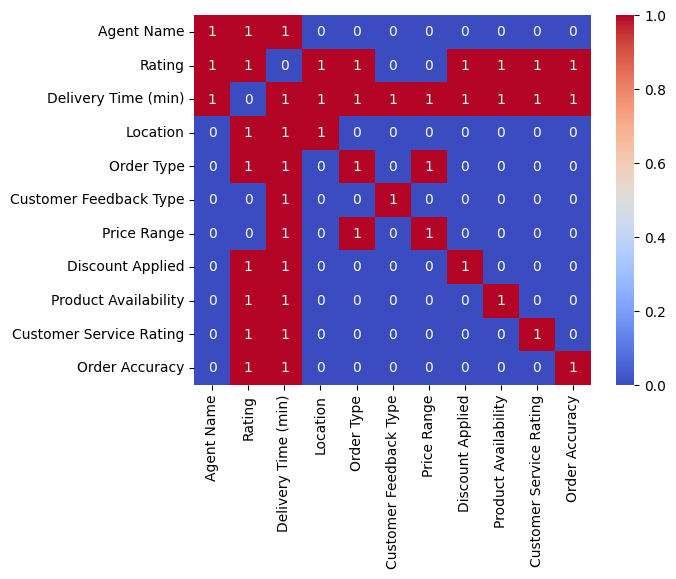

In [21]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [22]:
#INFERENCES:
#Though some columns showed minimal correlation, through statistical test we found it shows some significance.
# Yet some cloumn might show some significane in ML/Deep Learning considering the usecase of this project,we are going ahead without droping any columns